# M505B Into to AI and Machine Learning

- Importing all the packages that are requried.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings


# 1. Business Problem Understanding

- Defining the problem
  
  To develop an ML system for predicting the cost of insurance for policyholders according to certain factors. This would eliminate the need to predict manually and speed up the process of knowing the cost.

- ML Task

   Medical Insurance cost detection system using Linear Regression Model.

# 2. Data Collection




- Identifying data sources

  Loading the data obtained from csv file to pandas dataframe(from kaggle). It has the factors that is required for cost prediction for insurance. It involves features such as BMI, number of children, if the person is smoker or not and a target label column which is the charges column.

In [3]:
df = pd.read_csv("/content/medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df["charges"] = df["charges"].astype(int)

- I am going to split the data into train and test sets.

In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df size:", df.shape)
print("df trainsize:", df_train.shape)
print("df testsize:", df_test.shape)

df size: (2772, 7)
df trainsize: (2079, 7)
df testsize: (693, 7)


# 3. Data Exploration

In [6]:
df.shape

(2772, 7)

In [7]:
df_train.shape

(2079, 7)

- We have three datas which are categorical features such as sex, smoker and region.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2079 entries, 2644 to 412
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2079 non-null   int64  
 1   sex       2079 non-null   object 
 2   bmi       2079 non-null   float64
 3   children  2079 non-null   int64  
 4   smoker    2079 non-null   object 
 5   region    2079 non-null   object 
 6   charges   2079 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 129.9+ KB


- isna() is used for checking missing or not meaningful values.

In [9]:
df_train.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Statistical analysis of the data

In [10]:
df_train.describe()

,age,bmi,children,charges
count,2079.000000,2079.000000,2079.000000,2079.000000
mean,39.103896,30.696890,1.108706,13310.822511
std,14.103965,6.069856,1.221683,12280.298903
min,18.000000,15.960000,0.000000,1121.000000
25%,26.000000,26.220000,0.000000,4719.000000
50%,39.000000,30.495000,1.000000,9288.000000
75%,51.000000,34.770000,2.000000,16450.000000
max,64.000000,53.130000,5.000000,63770.000000


- Analysing the distribution of each column

- 1) Age Column

<Axes: xlabel='age', ylabel='Count'>

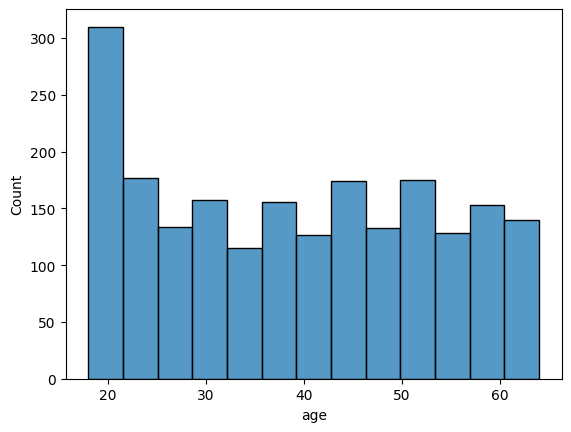

In [11]:
sns.histplot(df_train["age"])

- The above graph is to show what is the age of people enrolled for insurance. Most of the people are 20 of age.

- 2) Sex Column

In [12]:
df_train["sex"].value_counts()

,count
sex,
male,1040
female,1039


<Axes: xlabel='sex', ylabel='count'>

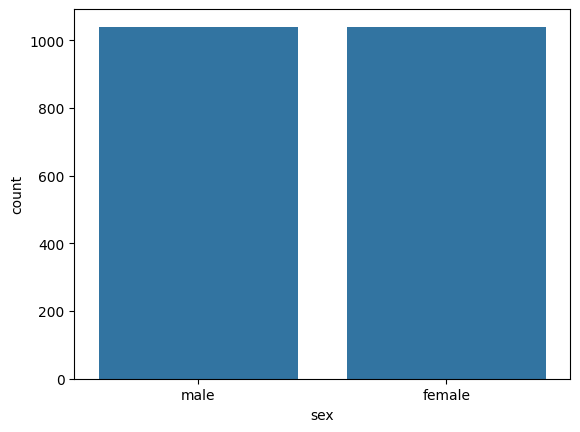

In [13]:
sns.countplot(x="sex", data=df_train)

- As we can see, most of them are males among them.

- 3) BMI column

<Axes: xlabel='bmi', ylabel='Count'>

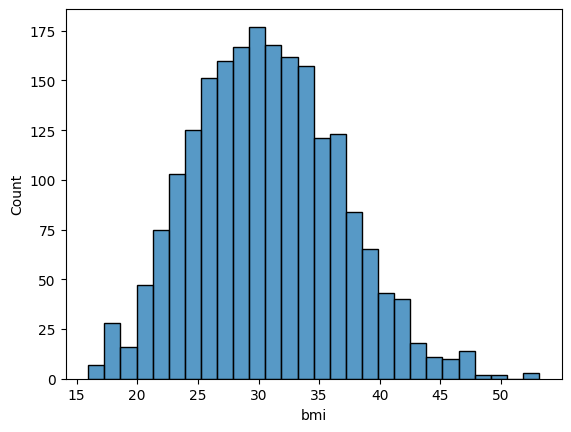

In [14]:
sns.histplot(df_train["bmi"])

In [15]:
df_train["bmi"].min()

15.96

In [16]:
df_train["bmi"].max()

53.13

According to the normal healthy BMI which is 18 - 30 of all ages, there are few people with BMI below 18 and there is more people who has above 30 of BMI.

- 4) Children column

<Axes: ylabel='count'>

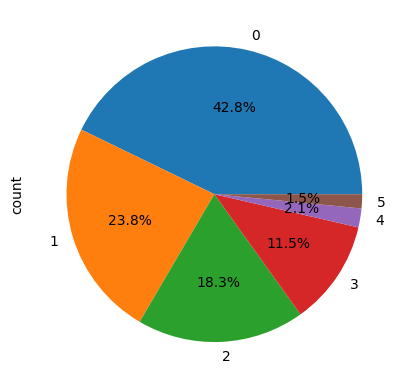

In [17]:
df_train["children"].value_counts().plot(kind="pie", autopct="%1.1f%%")

Here, we can see that most of the people have children.

In [18]:
df_train["children"].value_counts()

,count
children,
0,890
1,494
2,381
3,239
4,43
5,32


- 5) Smoker column

<Axes: xlabel='smoker'>

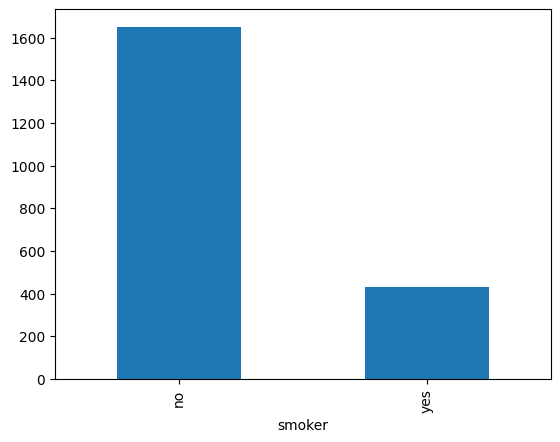

In [19]:
df_train["smoker"].value_counts().plot(kind="bar")

In [20]:
df_train["smoker"].value_counts()

,count
smoker,
no,1650
yes,429


Most of the people among are non-smokers.

- 6) Region column

<Axes: ylabel='region'>

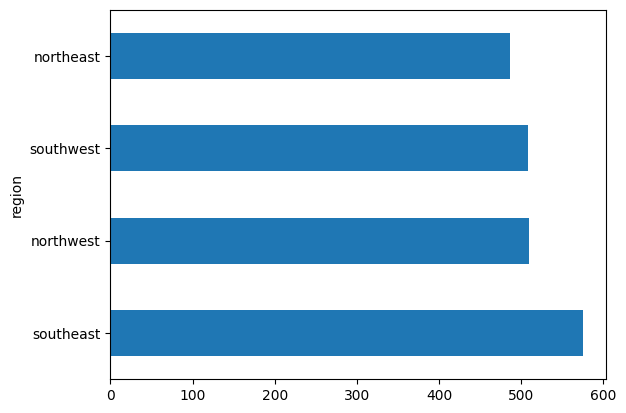

In [21]:
df_train["region"].value_counts().plot(kind="barh")

In [22]:
df_train["region"].value_counts()

,count
region,
southeast,575
northwest,509
southwest,508
northeast,487


Most of them are from southeast region.


# 4. Data Preprocessing

Seperating feature column from target.

In [23]:
a_train = df_train.drop("charges", axis=1)
b_train = df_train["charges"]
a_test = df_test.drop("charges", axis =1 )
b_test = df_test["charges"]

print("a_train size:", a_train.shape)
print("b_train size:", b_train.shape)
print("a_test size:", a_test.shape)
print("b_testsize:", b_test.shape)

a_train size: (2079, 6)
b_train size: (2079,)
a_test size: (693, 6)
b_testsize: (693,)


- In preprocessing step, the features such as age, sex, bmi, children, smoker, region (a_train) are seperated from charges(b_train) which is the target column to different variables.

# 5. Feature Engineering

In [24]:
numerical_attributes = a_train.select_dtypes(include = ["int64", "float64"]).columns.tolist()
numerical_attributes

['age', 'bmi', 'children']

In [25]:
categorical_attributes = a_train.select_dtypes(include = "object").columns.tolist()
categorical_attributes

['sex', 'smoker', 'region']

In [26]:
numerical_attributes = a_train.select_dtypes(include = ["int64", "float64"]).columns.tolist()

categorical_attributes = a_train.select_dtypes(include = "object").columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ("standard scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
     ("one_hot_encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown= "ignore"), categorical_attributes)
], remainder ="passthrough")

ct.fit(a_train)
a_train = ct.transform(a_train)
a_test = ct.transform(a_test)

print("a_train size:", a_train.shape)
print("a_test size:", a_test.shape)

a_train size: (2079, 11)
a_test size: (693, 11)


In [27]:
print(a_train)

[[ 1.12733748  1.1565015   1.54847823 ...  1.          0.
   0.        ]
 [-1.07115481  0.85081943 -0.9077422  ...  0.          1.
   0.        ]
 [-1.21299302  1.4506484  -0.9077422  ...  0.          0.
   1.        ]
 ...
 [ 0.63090374  0.98429786 -0.08900205 ...  1.          0.
   0.        ]
 [-1.42575034 -1.00469545 -0.08900205 ...  0.          0.
   1.        ]
 [-0.9293166  -2.2249519   0.72973809 ...  0.          0.
   0.        ]]


In [28]:
print(b_train)

2644    30063
1633     1986
888      1682
1450    14711
1083     4076
        ...  
2147     2416
1002     1972
2345    28468
2727     1837
412     14455
Name: charges, Length: 2079, dtype: int64


In [29]:
feature_names = ct.get_feature_names_out()
a_train_df = pd.DataFrame(a_train, columns=feature_names)
print(a_train_df)

      standard scaling__age  standard scaling__bmi  \
0                  1.127337               1.156502   
1                 -1.071155               0.850819   
2                 -1.212993               1.450648   
3                 -1.354831              -1.363934   
4                 -0.503802               0.132343   
...                     ...                    ...   
2074              -1.142074               0.742059   
2075              -1.071155              -0.806950   
2076               0.630904               0.984298   
2077              -1.425750              -1.004695   
2078              -0.929317              -2.224952   

      standard scaling__children  one_hot_encoding__sex_female  \
0                       1.548478                           0.0   
1                      -0.907742                           0.0   
2                      -0.907742                           0.0   
3                      -0.907742                           1.0   
4                    

- In this Feature Engineering step, the x_train data has been scales using standard scaling and the categorical columns are converted to binary(1,0) using One hot encoding.

# 6. Model Training

- The Model I am using here is Linear Regression Model.



In [30]:
model = sklearn.linear_model.LinearRegression()
model.fit(a_train, b_train)

LinearRegression()

# 7. Model Assesment

In [31]:
b_pred = model.predict(a_test)

Text(0.5, 1.0, 'Linear Regression')

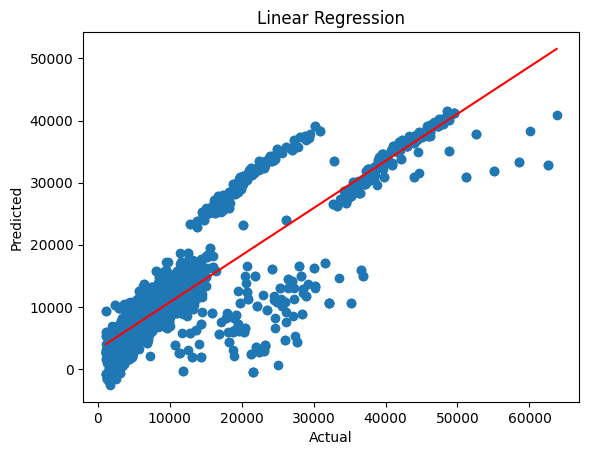

In [32]:
b_pred = model.predict(a_train)
plt.scatter(b_train, b_pred, label = "Data Points")
plt.plot(np.unique(b_train), np.poly1d(np.polyfit(b_train, b_pred, 1))(np.unique(b_train)), color='red', label="Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

In [33]:
training_pred = model.predict(a_train)

In [34]:
print(metrics.r2_score(b_train, training_pred))

0.7569642311728382


In [35]:
test_pred = model.predict(a_test)

In [36]:
print(metrics.r2_score(b_test, test_pred))

0.7295714872100362


Linear Regression model has 72.95% accuracy.

In [37]:

data = (19,1,0,27.9,0,0,1,0,0,0,1) # (age,female,male,bmi,children,no,yes,northeast,northwest,southeast,southwest)
data_np = np.asarray(data)
data_reshaped = data_np.reshape(1,-1)

print(model.predict(data_reshaped))

print(model.predict(data_reshaped)[0])

[1.71370121e+17]
1.7137012096907533e+17


###Testing other models: Logistic Regression, SVC(Support Vector Classification) and Decsion Tree

# Logistic Regression

In [38]:
model_1 = sklearn.linear_model.LogisticRegression(solver = "lbfgs")
model_1.fit(a_train, b_train)

LogisticRegression()

In [39]:
b_pred_1 = model_1.predict(a_test)

In [40]:
print(accuracy_score(b_test, b_pred_1))

0.03607503607503607


Using Logistic regression for this ML prediction is only giving 3.60% which is ver low compared to linear regression model.

# SVC

In [41]:
model_2 = SVC(kernel="linear")

In [42]:
model_2.fit(a_train, b_train)

SVC(kernel='linear')

In [43]:
b_pred = model_2.predict(a_test)

In [44]:
print(accuracy_score(b_test, b_pred))

0.10101010101010101


10.10% accuracy for the SVC model for this ML prediction which is better than Logistic regression but very less than Linear Regression.

# Decision Tree

In [45]:
model_3 = sklearn.tree.DecisionTreeClassifier(criterion ="gini",splitter = "best", max_depth = 10)
model_3.fit(a_train, b_train)

DecisionTreeClassifier(max_depth=10)

In [46]:
b_pred_3 = model_3.predict(a_test)

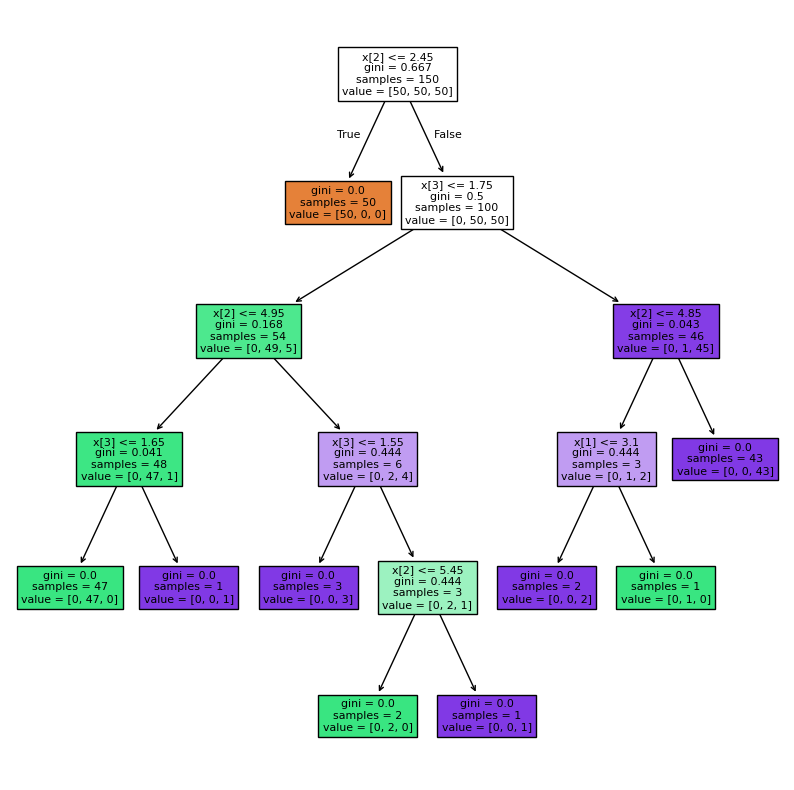

In [47]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
a, b = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(a, b)
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled = True)
plt.show()


In [48]:
print(accuracy_score(b_test, b_pred_3))

0.05339105339105339


Decision Tree gives 5.33% accuracy which is not good fit and which is not suitable to be performed for this ML prediction

# 7. Model Assesment

In [49]:
linear_grid = {"fit_intercept":[True, False]}
logistic_grid = {"C":[0.1,1,10],"solver":["liblinear", "lbfgs"]}
decision_grid = {"criterion":["gini", "entropy"], "max_depth":[None,5,10]}
svc_grid = {"C": [0.1, 1, 10], "kernel": ["linear","rbf"]}

In [50]:
linear_model = sklearn.linear_model.LinearRegression()
logistic_model = sklearn.linear_model.LogisticRegression()
decision_model = sklearn.tree.DecisionTreeClassifier()
svc_model = sklearn.svm.SVC()

In [51]:
from sklearn.metrics import make_scorer

In [52]:
linear_accuracy = sklearn.model_selection.GridSearchCV(linear_model, linear_grid, cv=5, scoring = make_scorer(mean_squared_error, greater_is_better=False))
logistic_accuracy = sklearn.model_selection.GridSearchCV(logistic_model, logistic_grid, cv=5, scoring = "accuracy")
decision_accuracy = sklearn.model_selection.GridSearchCV(decision_model, decision_grid, cv=5, scoring = "accuracy")
svc_accuracy = sklearn.model_selection.GridSearchCV(svc_model, svc_grid, cv=5, scoring = "accuracy")

In [53]:
warnings.filterwarnings("ignore")

In [54]:
linear_accuracy.fit(a_train, b_train)
logistic_accuracy.fit(a_train, b_train)
decision_accuracy.fit(a_train, b_train)
svc_accuracy.fit(a_train, b_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

So we can see for the above model assessment that SVC is the best model for this Machine Learning Prediction.